# Figures and analysis

This notebook contains scripts to reproduce the figures and analytical results of the manuscript. Full details of the plotting functions are typically contained in XXX.py. Figures are saved in PDF format in the figures/ folder.

# Contents

Libraries

Figures and data analysis
Figure 1. 
Figure 2. 
Figure S1. 
Figure S2. 
Analysis. Comparison of 

# Libraries

In [1]:
# Full library list and version numbers

print('Figures below were produced using the following packages:')

import os
import sys
print('python ==', sys.version)

import numpy as np
print('numpy ==', np.__version__)

import scipy as sp
import scipy.stats as st
print('scipy ==', sp.__version__)

import pandas as pd
print('pandas ==', pd.__version__)

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib ==', matplotlib.__version__)

import seaborn as sns 
print('seaborn ==', sns.__version__)

import warnings

from importlib import reload

import Plot


Figures below were produced using the following packages:
python == 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
numpy == 1.24.3
scipy == 1.11.1


c:\Users\my\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


pandas == 2.2.1
matplotlib == 3.7.2
seaborn == 0.12.2


## Figures and data analysis

## Figure 1. Sample Cervix Images

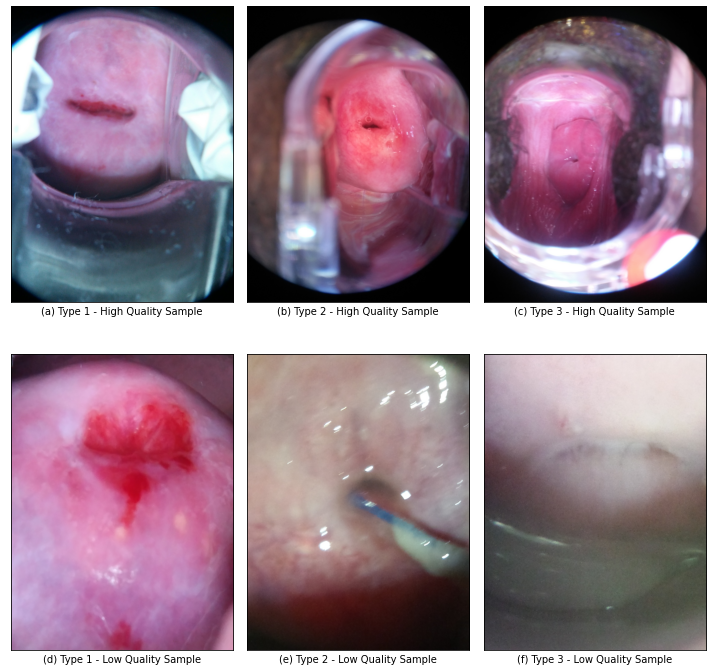

In [2]:
import matplotlib.image as mpimg

font = {'size': 10}
plt.rc('font', **font)

f, ax = plt.subplots(2, 3, figsize=(10, 10))
sample_img_folder = "./data/sample_img/"
img_list = [ 'Type_1_clear.jpeg',
             'Type_2_clear.jpeg',
             'Type_3_clear.jpeg',
             'Type_1_unclear.jpeg',
             'Type_2_unclear.jpeg',
             'Type_3_unclear.jpeg']

ax[0, 0].imshow(mpimg.imread(sample_img_folder + img_list[0]))
ax[0, 1].imshow(mpimg.imread(sample_img_folder + img_list[1]))
ax[0, 2].imshow(mpimg.imread(sample_img_folder + img_list[2]))
ax[1, 0].imshow(mpimg.imread(sample_img_folder + img_list[3]))
ax[1, 1].imshow(mpimg.imread(sample_img_folder + img_list[4]))
ax[1, 2].imshow(mpimg.imread(sample_img_folder + img_list[5]))
ax[0, 0].set_xlabel('(a) Type 1 - High Quality Sample')
ax[0, 1].set_xlabel('(b) Type 2 - High Quality Sample')
ax[0, 2].set_xlabel('(c) Type 3 - High Quality Sample')
ax[1, 0].set_xlabel('(d) Type 1 - Low Quality Sample')
ax[1, 1].set_xlabel('(e) Type 2 - Low Quality Sample')
ax[1, 2].set_xlabel('(f) Type 3 - Low Quality Sample')
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
f.tight_layout()
plt.savefig("./figures/Figure1_Sample_Image.pdf", dpi = 150)
plt.show()

## Figure 2. Confusion Matrix of Proposed ViT-LoRA Cervix Classifier

<Figure size 720x720 with 0 Axes>

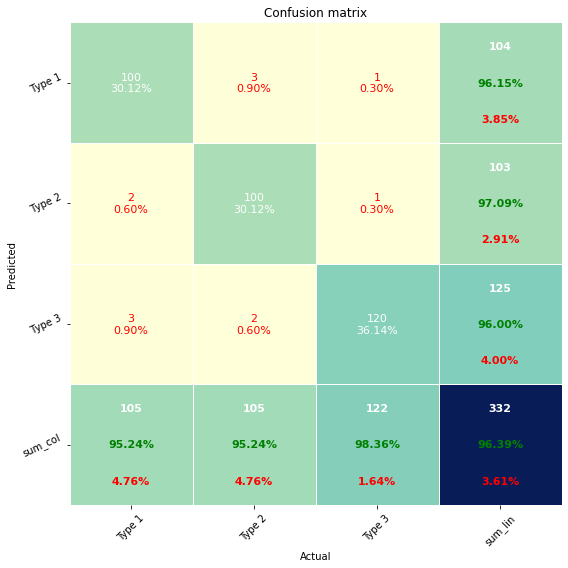

In [3]:
from pretty_confusion_matrix import pp_matrix
plt.figure(figsize=(10, 10))
confusion_matrix = pd.read_csv("./data/Confusion_Matrix.csv", index_col=0)
Plot.pp_matrix(confusion_matrix, cmap = 'YlGnBu')
plt.savefig("./figures/Figure2_Confusion_Matrix.pdf", dpi = 150)

## Figure 3. Model Performance Results

C:\Users\my\AppData\Local\Temp\ipykernel_20832\1016164566.py:2: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


Highest training accuracy:
Ours : 98.9 %
ResNet-50 : 94.5 %
ResNet-101 : 96.0 %
ResNeXt-50 : 95.6 %
ResNeXt-101 : 94.9 %
Lowest training loss:
Ours : 1.1
ResNet-50 : 2.5
ResNet-101 : 3.1
ResNeXt-50 : 2.6
ResNeXt-101 : 2.6


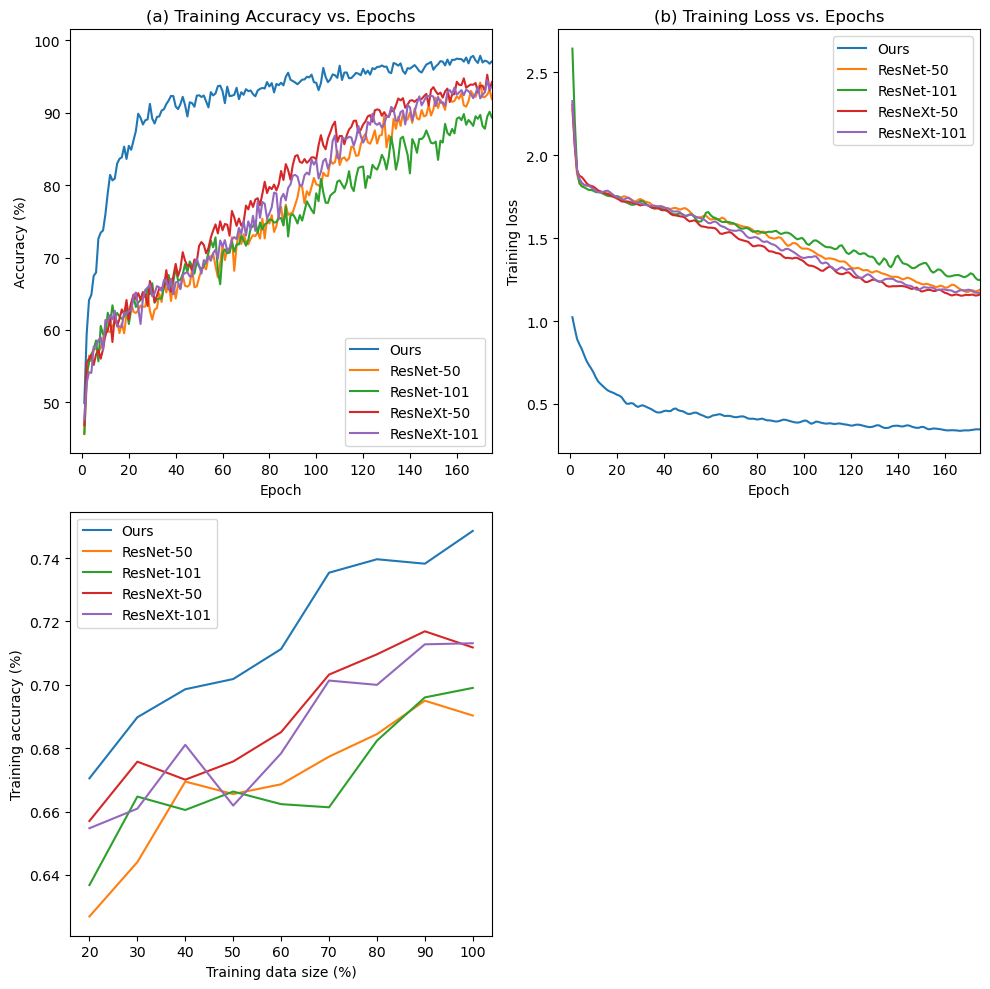

In [2]:
import matplotlib.gridspec as gridspec
from scipy.ndimage.filters import gaussian_filter1d

def training_epoch(df, model_name, label, smoothness, axis_i):
    ysmoothed = gaussian_filter1d(df[model_name], sigma = smoothness)
    axis_i.plot(df['Epoch'], ysmoothed, linestyle = '-', label = label)
    
def training_data_size(df, model_name, label, smoothness, axis_i):
    ysmoothed = gaussian_filter1d(df[model_name], sigma = smoothness)
    axis_i.plot(df['data size'], ysmoothed, linestyle = '-', label = label)

percentage_list = ["30.0%", "40.0%", "50.0%", "60.0%", "70.0%", "80.0%", "90.0%", "100%"]
Model_list = ['Ours', 'ResNet-50', 'ResNet-101', 'ResNeXt-50', 'ResNeXt-101']

fig = plt.figure(tight_layout=True, figsize=(10, 10))
gs = gridspec.GridSpec(2, 2)

# subfigure_1
ax = fig.add_subplot(gs[0, 0])
percentage = percentage_list[-1]
smoothness = 0.4
accuracy_epoch = pd.read_csv(f"./data/accuracy_epoch_{percentage}.csv")
accuracy_epoch *= 100
accuracy_epoch['Epoch'] /= 100
ax.set_xlim([-5, 175])
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy (%)')
ax.set_title('(a) Training Accuracy vs. Epochs')
print('Highest training accuracy:')
for model in Model_list:
    training_epoch(accuracy_epoch, model + '_Train', model, smoothness, ax)
    print(model, ':', round(max(accuracy_epoch[model+'_Train']), 1), '%')
ax.legend()

# subfigure_2
ax = fig.add_subplot(gs[0, 1])
smoothness = 1
loss_epoch = pd.read_csv(f"./data/train_loss_epoch_{percentage}.csv")
ax.set_xlim([-5, 175])
ax.set_xlabel('Epoch')
ax.set_ylabel('Training loss')
ax.set_title('(b) Training Loss vs. Epochs')

print('Lowest training loss:')
for model in Model_list:
    training_epoch(loss_epoch, model, model, smoothness, ax)
    print(model, ':', round(max(loss_epoch[model]), 1))

ax.legend()


# subfigure_3
ax = fig.add_subplot(gs[1, 0])

smoothness = 0.5
acc_data_size = pd.read_csv("./data/accuracy_data_size.csv")
Model_list = ['Ours', 'ResNet-50', 'ResNet-101', 'ResNeXt-50', 'ResNeXt-101']
for model in Model_list:
    training_data_size(acc_data_size, model, model, smoothness, ax)
plt.xlabel('Training data size (%)')
plt.ylabel('Training accuracy (%)')
plt.legend()

# acc_list = []
# model_name = []
# data_size = []
# for percentage in percentage_list:
#     test_acc_epoch = pd.read_csv(f"./data/accuracy_epoch_{percentage}.csv")
#     test_acc_epoch = test_acc_epoch.loc[test_acc_epoch['Epoch']>=10]
#     test_acc_epoch = test_acc_epoch.drop('Epoch', axis=1)
#     test_acc_epoch *= 100
#     test_acc_epoch = test_acc_epoch[[i+'_Test' for i in Model_list]]

#     for column in [i+'_Test' for i in Model_list]:
#         acc_list += test_acc_epoch[column].tolist()
#         model_name += [column[:-5]]*test_acc_epoch.shape[0]
#         data_size += [percentage]*test_acc_epoch.shape[0]

# df_plot = pd.DataFrame(columns=['Model', 'data_size', 'Accuracy'])
# df_plot['Model'] = model_name
# df_plot['Accuracy'] = acc_list
# df_plot['data_size'] = data_size
# sns.boxplot(data=df_plot, x="data_size", y="Accuracy", hue="Model", ax = ax)
# ax.set_ylabel("Accuracy (%)")
# ax.set_xlabel("% of Training Data Used")
# ax.set_ylim([50, 75])
# ax.set_title("(c) Testing Accuracy vs. % of Training Data Used")

plt.savefig("./figures/Figure4_Accuracy_Loss_Epochs.pdf", dpi = 150)

# Supplemental Figure 1. 

Highest testing accuracy, 30.0%:
Ours : 69.1 %
ResNet-50 : 64.3 %
ResNet-101 : 67.0 %
ResNeXt-50 : 68.0 %
ResNeXt-101 : 65.8 %
Highest testing accuracy, 40.0%:
Ours : 69.9 %
ResNet-50 : 67.4 %
ResNet-101 : 65.8 %
ResNeXt-50 : 66.8 %
ResNeXt-101 : 68.8 %
Highest testing accuracy, 50.0%:
Ours : 70.1 %
ResNet-50 : 66.4 %
ResNet-101 : 66.8 %
ResNeXt-50 : 67.6 %
ResNeXt-101 : 65.6 %
Highest testing accuracy, 60.0%:
Ours : 70.9 %
ResNet-50 : 66.8 %
ResNet-101 : 66.2 %
ResNeXt-50 : 68.4 %
ResNeXt-101 : 67.8 %
Highest testing accuracy, 70.0%:
Ours : 73.8 %
ResNet-50 : 67.8 %
ResNet-101 : 65.8 %
ResNeXt-50 : 70.5 %
ResNeXt-101 : 70.5 %
Highest testing accuracy, 80.0%:
Ours : 74.0 %
ResNet-50 : 68.4 %
ResNet-101 : 68.4 %
ResNeXt-50 : 70.9 %
ResNeXt-101 : 69.7 %
Highest testing accuracy, 90.0%:
Ours : 73.6 %
ResNet-50 : 69.7 %
ResNet-101 : 69.7 %
ResNeXt-50 : 71.9 %
ResNeXt-101 : 71.5 %
Highest testing accuracy, 100%:
Ours : 75.0 %
ResNet-50 : 68.9 %
ResNet-101 : 69.9 %
ResNeXt-50 : 71.1 %
ResNeX

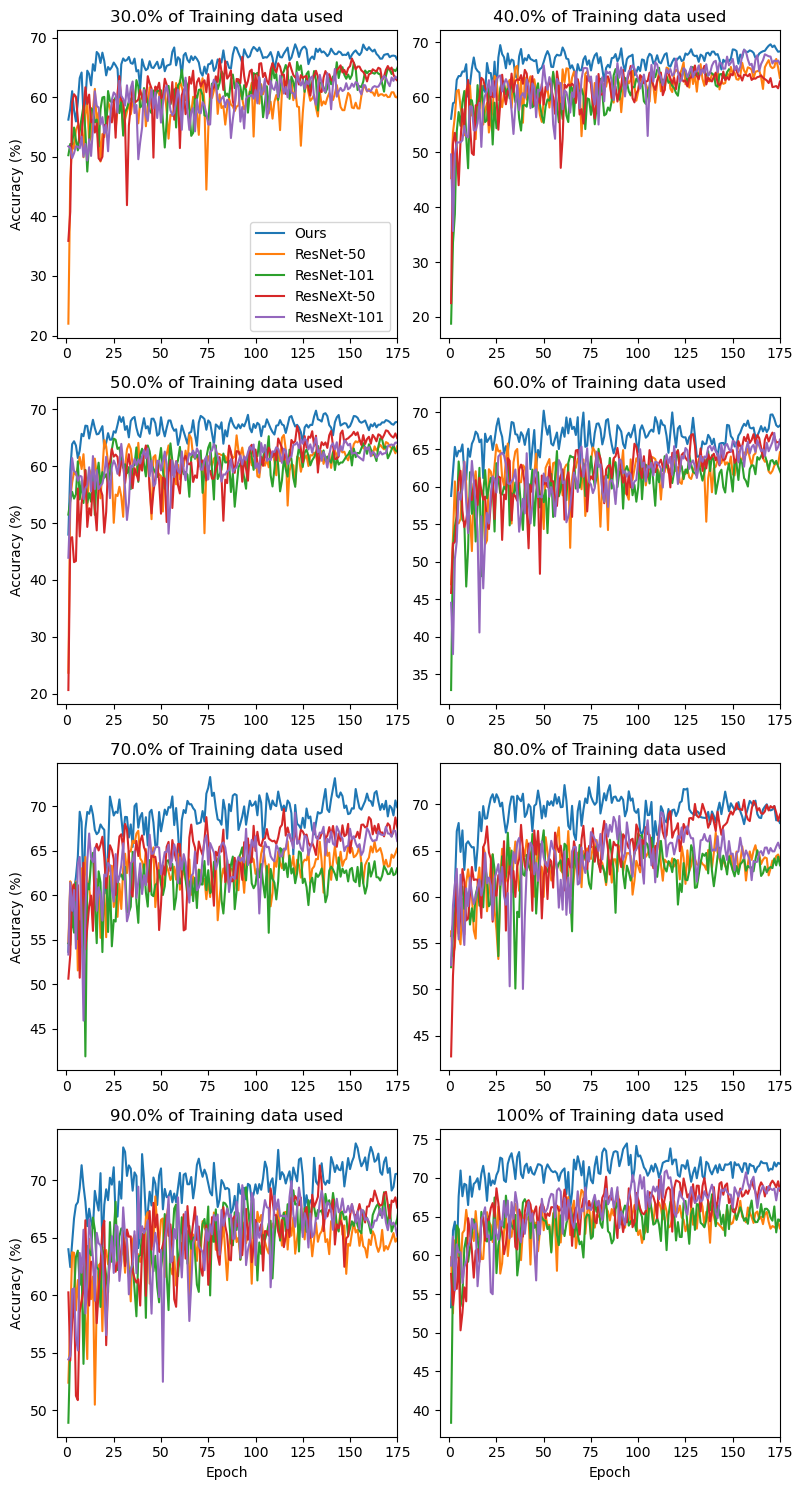

In [3]:
f, ax = plt.subplots(4, 2, figsize=(8,15))

axis_list = [[0,0], [0,1], [1,0], [1,1], [2,0], [2,1], [3,0], [3,1]]

for i in range(len(percentage_list)):
    percentage = percentage_list[i]
    test_acc_epoch = pd.read_csv(f"./data/accuracy_epoch_{percentage}.csv")
    test_acc_epoch *= 100
    test_acc_epoch['Epoch'] /= 100
    axis_current = ax[axis_list[i][0], axis_list[i][1]]
    axis_current.set_xlim([-5, 175])
    if axis_list[i][0] == 3:
        axis_current.set_xlabel('Epoch')
    if axis_list[i][1] == 0:
        axis_current.set_ylabel('Accuracy (%)')
    axis_current.set_title('%s of Training data used' %percentage)
#     axis_current.set_title('Test accuracy vs. Epochs')

    print('Highest testing accuracy, %s:'%percentage)
    for model in Model_list:
        training_epoch(test_acc_epoch, model + '_Test', model, smoothness, axis_current)
        print(model, ':', round(max(test_acc_epoch[model+'_Test']), 1), '%')
plt.tight_layout()
ax[0,0].legend()